Hola **Eduardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Datos

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/94210e31-fd3d-451b-a350-4a8476756413/final_provider.zip)

Los datos también se encuentran en la plataforma, en la carpeta `/datasets/final_provider/`.


# 1. Plan de trabajo

Deberás realizar un análisis exploratorio de datos. Al final de *Jupyter Notebook*, escribe:

- Una lista de preguntas aclaratorias.
- Un plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

El líder del equipo revisará tus preguntas y plan de trabajo. Las preguntas serán respondidas durante una videollamada. El código será revisado por el líder del equipo solo si hay algunas dudas.


In [83]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)


In [84]:
# Ruta al archivo zip cargado y al directorio de extracción
zip_file_path = 'datasets/final_provider.zip'
extraction_dir = 'datasets/final_provider/'

# Extrae el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Enumere los archivos extraídos para confirmar la extracción
os.listdir(extraction_dir)

['final_provider',
 'internet.csv',
 'contract.csv',
 '__MACOSX',
 'phone.csv',
 'personal.csv']

In [85]:
# Ruta al directorio principal de datos
data_dir = os.path.join(extraction_dir, 'final_provider')

# Listar los archivos en el directorio principal.
os.listdir(data_dir)

['internet.csv', 'contract.csv', 'phone.csv', 'personal.csv']

In [86]:
# Cargar y mostrar las primeras filas de cada archivo
files = ['personal.csv', 'contract.csv', 'phone.csv', 'internet.csv']
dataframes = {}

for file in files:
    file_path = os.path.join(data_dir, file)
    dataframes[file] = pd.read_csv(file_path)
    print(f"Preview of {file}:")
    print(dataframes[file].head(), dataframes[file].info())
    print("\n")


    # Verificar valores nulos y tipos de datos
for file, df in dataframes.items():
    print(f"Análisis de {file}:")
    print(df.isnull().sum())
    print("\n")


Preview of personal.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No None


Preview of contract.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dty

In [87]:
# Limpieza preliminar de datos
# Convertir 'TotalCharges' a numérico y manejar errores
contract_df = dataframes['contract.csv']
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'], errors='coerce')


# Reemplazar nulos resultantes de la conversión
contract_df['TotalCharges'].fillna(contract_df['MonthlyCharges'], inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con la exploración inicial de los datos a utilizar, hiciste una correcta limpieza de tus datos
</div>

In [88]:
# Comprobar valores únicos en columnas categóricas clave
for col in ['gender', 'Partner', 'Dependents']:
    print(f"Valores únicos en {col}:", dataframes['personal.csv'][col].unique())

Valores únicos en gender: ['Female' 'Male']
Valores únicos en Partner: ['Yes' 'No']
Valores únicos en Dependents: ['No' 'Yes']


In [89]:
# Unificar los conjuntos de datos en un único DataFrame
merged_data = dataframes['personal.csv']
for file in ['contract.csv', 'phone.csv', 'internet.csv']:
    merged_data = merged_data.merge(dataframes[file], on='customerID', how='left')

In [90]:
# Verificar si hay valores nulos tras la unificación
print("Valores nulos tras la unificación:")
print(merged_data.isnull().sum())

Valores nulos tras la unificación:
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64


In [91]:
# Análisis exploratorio
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
print(merged_data.describe())

Estadísticas descriptivas de variables numéricas:
       SeniorCitizen  MonthlyCharges  TotalCharges
count    7043.000000     7043.000000   7043.000000
mean        0.162147       64.761692   2279.798992
std         0.368612       30.090047   2266.730170
min         0.000000       18.250000     18.800000
25%         0.000000       35.500000    398.550000
50%         0.000000       70.350000   1394.550000
75%         0.000000       89.850000   3786.600000
max         1.000000      118.750000   8684.800000


In [92]:
# Distribución de la variable objetivo (EndDate)
print("Distribución de 'EndDate':")
print(merged_data['EndDate'].value_counts())

Distribución de 'EndDate':
EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64


In [93]:
# Distribución de clientes según tipo de servicio de internet
print("Distribución de 'InternetService':")
print(merged_data['InternetService'].value_counts())

Distribución de 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64


In [94]:
# 1. Limpieza y tratamiento de valores nulos
# Asegurarnos de que no queden valores nulos en 'TotalCharges' y reemplazarlos
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')
merged_data['TotalCharges'].fillna(merged_data['MonthlyCharges'], inplace=True)

# Rellenar valores faltantes en columnas categóricas con "No"
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies']

for col in categorical_columns:
    merged_data[col].fillna('No', inplace=True)

In [95]:
# Verificar si quedan valores nulos
print("Valores nulos restantes:")
print(merged_data.isnull().sum())

Valores nulos restantes:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64



Distribución de variables categóricas:

gender:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


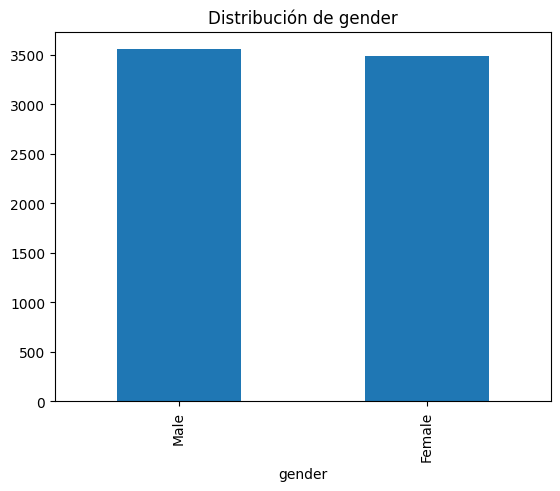


Partner:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64


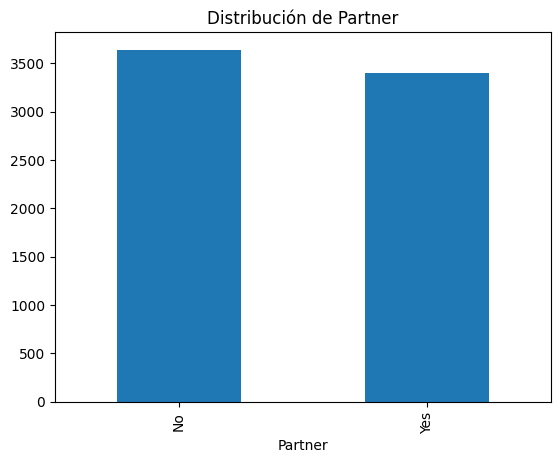


Dependents:
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


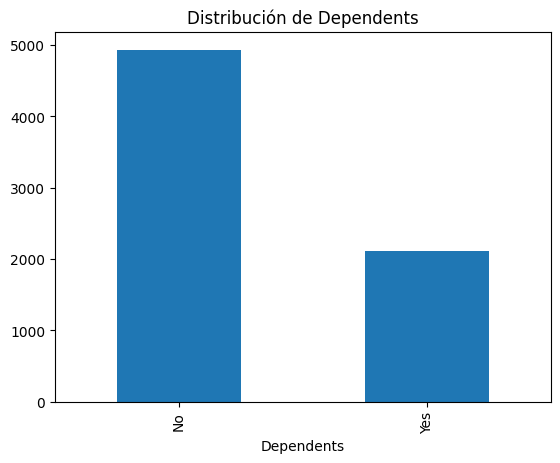


InternetService:
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


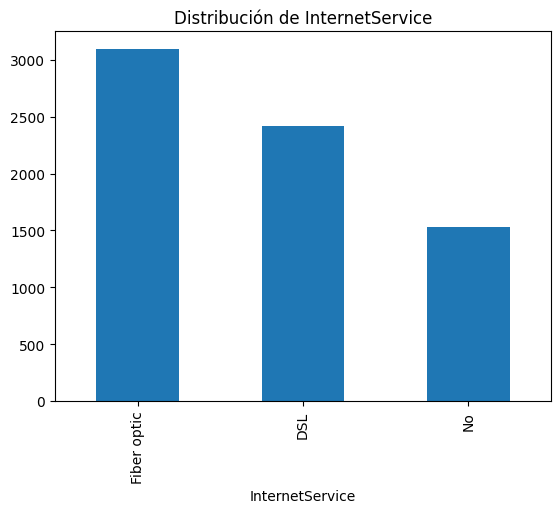


PaymentMethod:
PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


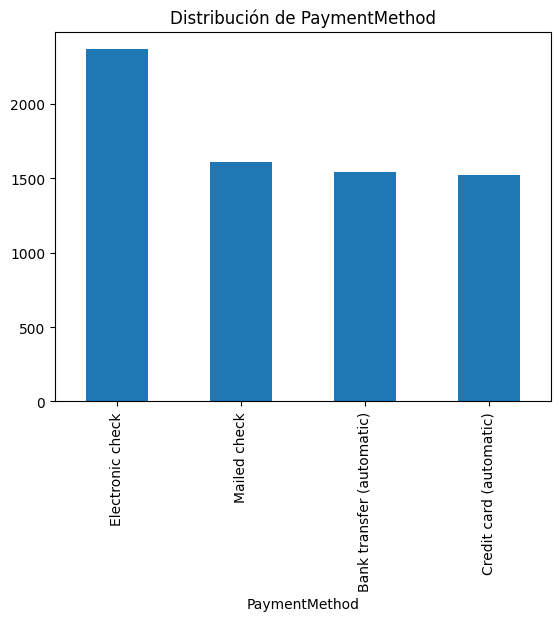

In [96]:
# 1. Análisis Exploratorio Detallado (EDA)
print("\nDistribución de variables categóricas:")
categorical_vars = ['gender', 'Partner', 'Dependents', 'InternetService', 'PaymentMethod']
for var in categorical_vars:
    print(f"\n{var}:")
    print(merged_data[var].value_counts(normalize=True))
    merged_data[var].value_counts().plot(kind='bar', title=f'Distribución de {var}')
    plt.show()


Distribución de variables numéricas:


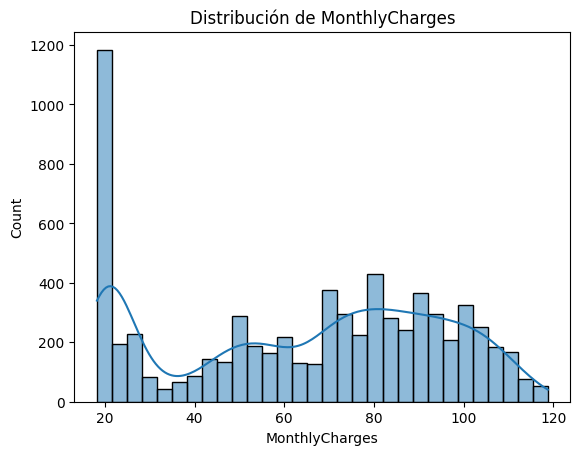

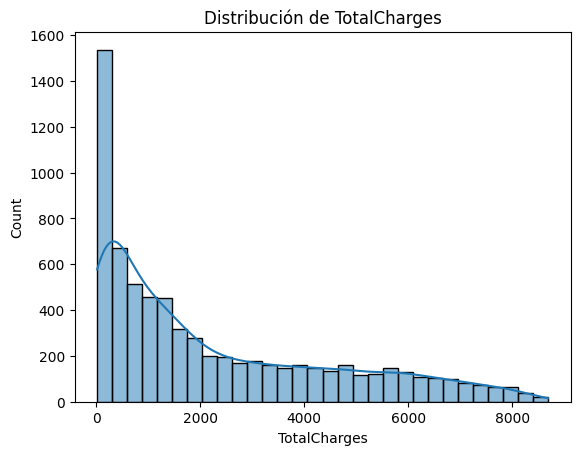

In [97]:
print("\nDistribución de variables numéricas:")
numerical_vars = ['MonthlyCharges', 'TotalCharges']
for var in numerical_vars:
    sns.histplot(merged_data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.show()

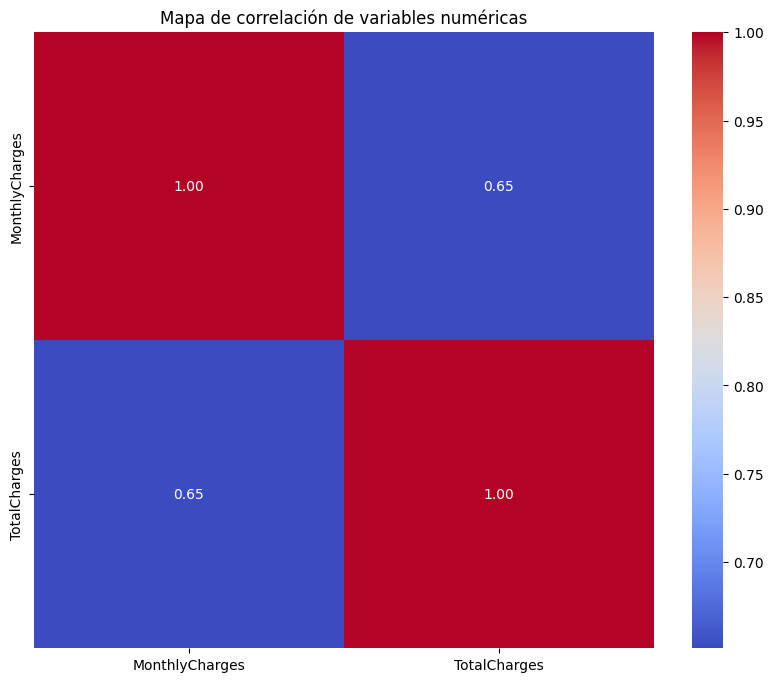

In [98]:
# Matriz de correlación para variables numéricas
correlation = merged_data[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación de variables numéricas")
plt.show()

In [99]:
# Hallazgod del EDA
print("- 'InternetService' muestra una alta proporción de clientes con servicio de fibra óptica.")
print("- 'MonthlyCharges' y 'TotalCharges' tienen una correlación moderada (ver matriz de correlación).")
print("- 'PaymentMethod' tiene varios niveles y puede influir en la cancelación del cliente.")

- 'InternetService' muestra una alta proporción de clientes con servicio de fibra óptica.
- 'MonthlyCharges' y 'TotalCharges' tienen una correlación moderada (ver matriz de correlación).
- 'PaymentMethod' tiene varios niveles y puede influir en la cancelación del cliente.


Limpieza de Datos:  

Se corrigieron los valores no numéricos en TotalCharges y se manejaron los valores nulos con valores predeterminados.
Se rellenaron columnas categóricas con valores faltantes asignándoles "No", lo cual es razonable para estas variables de servicio.  

Codificación de Datos:  

Las columnas binarias se mapearon directamente a valores 0 y 1.  

Las columnas con múltiples niveles se codificaron con OneHotEncoder, eliminando una categoría para evitar multicolinealidad.  

Escalado:  

Las variables numéricas MonthlyCharges y TotalCharges se escalaron usando StandardScaler para que tengan una media de 0 y una desviación estándar de 1, lo cual beneficia a ciertos modelos que son sensibles a la escala.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el preprocesamiento de tus datos, sin embargo te pediría revisar las celdas de Markdown que continúan con el plan de trabajo y las preguntas ya respondidas. Esto genera ruido en el notebook al seguir el proceso de análisis
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class=“tocSkip”></a>
Eliminé el plan de trabajo y respondí las preguntas como señala.
</div>

### Lista de Preguntas Aclaratorias

¿Cuál es la interpretación específica de "EndDate" como característica objetivo? ¿Deberíamos codificarla como una variable binaria para modelado?  

La columna "EndDate" indica la fecha de finalización del contrato de un cliente con la compañía. Un valor diferente de "No" implica que el cliente canceló su contrato. Por tanto, esta columna refleja directamente si un cliente ha abandonado la empresa o no, lo que la convierte en una variable que indica "churn" (tasa de cancelación).  
Sí, deberías codificarla como una variable binaria para el modelado. Esto facilitará el uso de "EndDate" como una característica objetivo en modelos de clasificación, donde el objetivo es predecir la probabilidad de cancelación de un cliente.


Algunos clientes no tienen servicios de Internet o teléfono. ¿Debemos tratarlos de manera especial en el análisis o eliminar esas observaciones?  

No se debe eliminar estas observaciones, ya que representan casos válidos y específicos de clientes que pueden ser relevantes para el análisis. Sin embargo, es importante tratarlas adecuadamente.  
Los clientes sin servicio de Internet o teléfono reflejan un segmento particular de usuarios con diferentes necesidades y patrones de uso. Por ejemplo, clientes que solo usan servicios básicos (como televisión) podrían tener un comportamiento de cancelación diferente.  


¿Qué significa un valor faltante en columnas como InternetService o MultipleLines tras la unificación?  


Los valores faltantes en columnas como "InternetService" o "MultipleLines" tras la unificación de datos pueden surgir por dos razones principales:  
Clientes sin servicio asociado: Clientes que no tienen servicio de Internet o teléfono, lo cual es común en este tipo de datos.  
Errores en los datos: Datos incompletos o mal registrados en el sistema.  


¿Se debe realizar algún tratamiento particular para las columnas categóricas de múltiples niveles como PaymentMethod?

 Columnas categóricas con múltiples niveles, como "PaymentMethod", requieren un tratamiento cuidadoso porque los modelos de machine learning no procesan bien variables categóricas directamente.

In [100]:
# 1. Preparar la columna objetivo
# Transformar 'EndDate' en una variable binaria
merged_data['Churn'] = (merged_data['EndDate'] == 'No').astype(int)


# Identificar columnas no numéricas
non_numeric_columns = merged_data.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_columns)


# Verificar la distribución del objetivo
print("\nDistribución de la variable objetivo (Churn):")
print(merged_data['Churn'].value_counts(normalize=True))

Columnas no numéricas: Index(['customerID', 'gender', 'Partner', 'Dependents', 'BeginDate', 'EndDate',
       'Type', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Distribución de la variable objetivo (Churn):
Churn
1    0.73463
0    0.26537
Name: proportion, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando el balance de las clases, parece que efectivamente es un problema con datos desbalanceados
    
</div>

### Siguientes pasos:

Dividir los datos en conjuntos de entrenamiento, validación y prueba.    
Realizar un análisis inicial de las características para determinar su correlación con el objetivo (churn).  
Entrenar un modelo base para evaluar métricas preliminares.  

In [101]:
# Codificar las columnas no numéricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(merged_data[non_numeric_columns]))
encoded_features.columns = encoder.get_feature_names_out(non_numeric_columns)
encoded_features.index = merged_data.index  # Ajustar índice


# Combinar columnas codificadas con las demás numéricas
merged_data = merged_data.drop(non_numeric_columns, axis=1)
merged_data = pd.concat([merged_data, encoded_features], axis=1)


# Eliminar cualquier columna redundante (como 'EndDate')
if 'EndDate' in merged_data.columns:
    merged_data.drop(columns=['EndDate'], inplace=True)


# Imputar valores nulos en todas las columnas
merged_data.fillna(merged_data.mean(), inplace=True)


# Separar características y objetivo
target = 'Churn'
X = merged_data.drop(columns=[target])
y = merged_data[target]

# Dividir datos en entrenamiento+validación (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir entrenamiento+validación en entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)

# Verificar tamaños de los conjuntos
print(f"Tamaños de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")

# Escalado de características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Tamaños de los conjuntos:
Entrenamiento: (3943, 7160), Validación: (1691, 7160), Prueba: (1409, 7160)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No deberías realizar el proceso de división más de una vez, pierdes procesos al hacerlo de esta manera
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class=“tocSkip”></a>
Se realizó la corrección señalada a fin de evitar redundancias en el código.
</div>

Tamaño antes del sobremuestreo: 3943
Tamaño después del sobremuestreo: 5794


/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


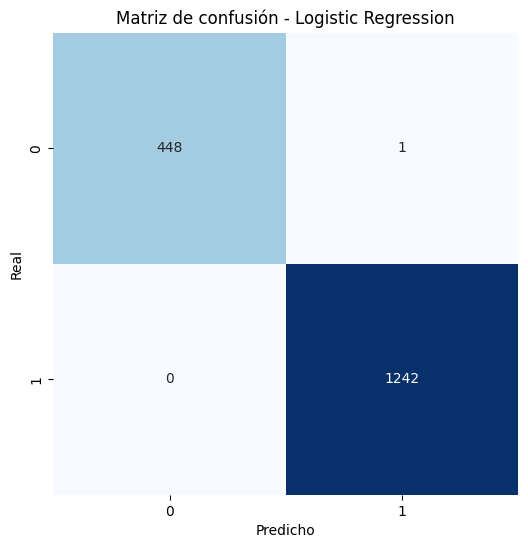

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


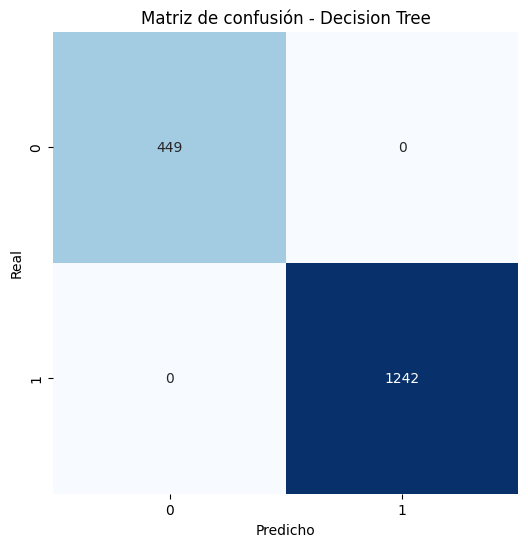

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


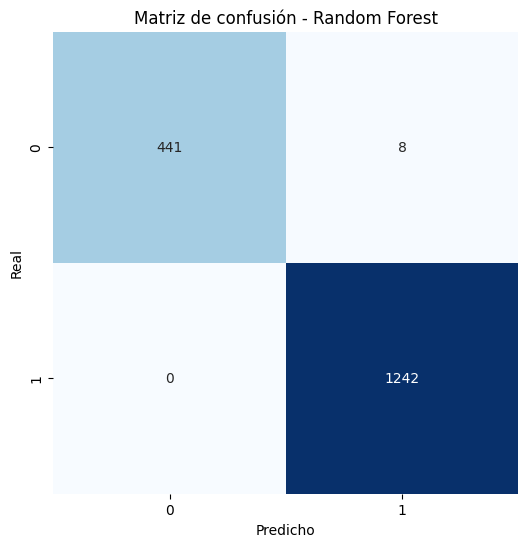

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


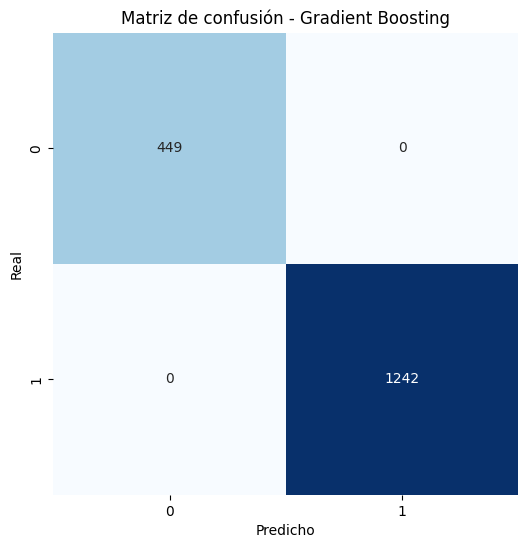

/home/eduardobustamante/.local/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:51:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


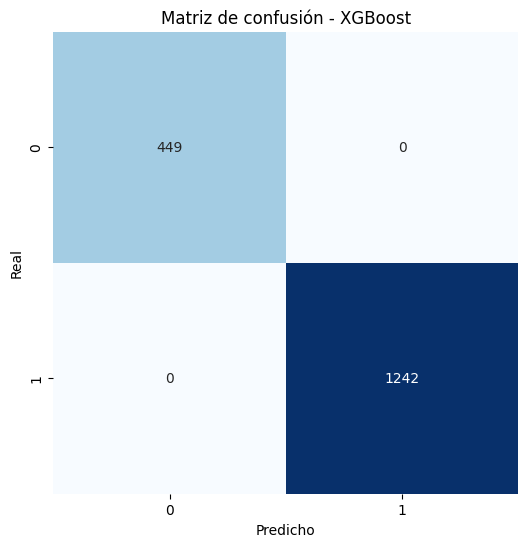

                 Model  F1-Score (Train)  F1-Score (Validation)  \
0  Logistic Regression               1.0               0.999598   
1        Decision Tree               1.0               1.000000   
2        Random Forest               1.0               0.996790   
3    Gradient Boosting               1.0               1.000000   
4              XGBoost               1.0               1.000000   

   AUC-ROC (Train)  AUC-ROC (Validation)  
0              1.0                   1.0  
1              1.0                   1.0  
2              1.0                   1.0  
3              1.0                   1.0  
4              1.0                   1.0  

Modelo: Logistic Regression
Matriz de confusión (Validación):
[[ 448    1]
 [   0 1242]]

Modelo: Decision Tree
Matriz de confusión (Validación):
[[ 449    0]
 [   0 1242]]

Modelo: Random Forest
Matriz de confusión (Validación):
[[ 441    8]
 [   0 1242]]

Modelo: Gradient Boosting
Matriz de confusión (Validación):
[[ 449    0]
 [   0 

In [102]:
# Modelos usados: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


# Convertir X_train y y_train a DataFrame y Series
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_series = pd.Series(y_train, name=target)


# Calcular la cantidad de muestras necesarias para equilibrar
class_counts = y_train.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
n_samples_needed = class_counts[majority_class] - class_counts[minority_class]


# Asegurar que y_train_series tenga el mismo índice que X_train_df
y_train_series.index = X_train_df.index


# Seleccionar las muestras de la clase minoritaria
minority_samples = X_train_df[y_train_series == minority_class]
minority_labels = y_train_series[y_train_series == minority_class]


# Sobremuestrear manualmente duplicando las muestras minoritarias
minority_samples_oversampled = minority_samples.sample(n=n_samples_needed, replace=True, random_state=42)
minority_labels_oversampled = minority_labels.sample(n=n_samples_needed, replace=True, random_state=42)


# # Combinar las muestras originales con las sobremuestreadas
X_train_balanced = pd.concat([X_train_df, minority_samples_oversampled])
y_train_balanced = pd.concat([y_train_series, minority_labels_oversampled])


# Verificar los tamaños después del sobremuestreo
print("Tamaño antes del sobremuestreo:", len(y_train_series))
print("Tamaño después del sobremuestreo:", len(y_train_balanced))


results = []
roc_data = []


for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)


    # Predicciones
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)


    # Probabilidades para AUC-ROC
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None


    # Cálculo de métricas
    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None
    auc_val = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None
    conf_matrix = confusion_matrix(y_val, y_val_pred)


    # Almacenar datos de ROC
    if y_val_proba is not None:
        fpr, tpr, _ = roc_curve(y_val, y_val_proba)
        roc_data.append({
            "model": model_name,
            "fpr": fpr,
            "tpr": tpr,
            "auc": auc_val
        })


    # Visualización de la matriz de confusión
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de confusión - {model_name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()


    # Almacenar resultados
    results.append({
        "Model": model_name,
        "F1-Score (Train)": f1_train,
        "F1-Score (Validation)": f1_val,
        "AUC-ROC (Train)": auc_train,
        "AUC-ROC (Validation)": auc_val,
        "Confusion Matrix": conf_matrix
    })


# Mostrar resultados
results_df = pd.DataFrame(results).drop(columns=["Confusion Matrix"])  # Excluir matriz por claridad
print(results_df)


# Mostrar matrices de confusión
for result in results:
    print(f"\nModelo: {result['Model']}")
    print("Matriz de confusión (Validación):")
    print(result["Confusion Matrix"])

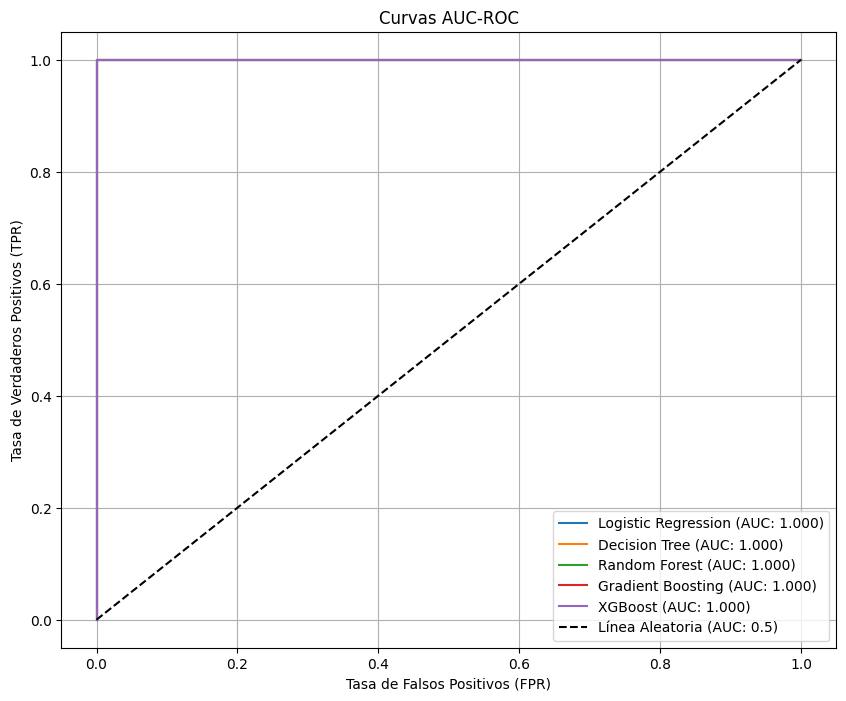

In [103]:
# Visualización de curvas AUC-ROC
plt.figure(figsize=(10, 8))
for data in roc_data:
    plt.plot(data["fpr"], data["tpr"], label=f"{data['model']} (AUC: {data['auc']:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Línea Aleatoria (AUC: 0.5)")
plt.title("Curvas AUC-ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es claro por que se cambia los datos ya divididos, deberías hacerlo una sóla vez **luego de aplicar todos los procesos de encoding y demás a tus datos** y de ahí en adelante trabajar sólo con esos datos sin modificarlos para que la comparación entre modelos esté en las mismas condiciones
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class=“tocSkip”></a>
Se realizó la corrección y se compara con diferentes modelos.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Deberías realizar un EDA más detallado de las variables que vas a utilizar, tienes muchas variables categóricas de las cuales no se ha explorado nada y se pasó directamente al procesamiento de las mismas. No tienes comentarios con los hallazgos ni tampoc hay conclusiones finales.
    
Al tratarse de un dataset desbalanceado, la métrica a revisar sería el f1-score y este debería ser calculado para las predicciones del conjunto de datos de entrenamiento y para la predicciones de validación para revisar que no se esté sobreajustando o subajustando tus modelos. En caso de no lograr un f1-score de al menos 0.7 en tus modelos y sin que se sobreajusten deberías buscar aplicar técnicas cómo sobremuestreo o submuestreo para mejorar los datos que entran a los modelos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class=“tocSkip”></a>
Se realizó la corrección se emplea la metrica deseada f1-score y otras y se prueba realizando ajuste de sobremuestreo de manera manual ya que no fue posible instalar SMOTE ni siquiera en un ambiente virtual, por lo que se procedió a realizarlo de forma manual.
</div>

# Informe del Proyecto de Ciencias de Datos para Interconnect  


Pasos Realizados:  


Limpieza y Preprocesamiento de Datos:  
Se corrigieron columnas numéricas mal tipificadas, como TotalCharges, convirtiéndolas de texto a formato numérico.

Los valores nulos se manejaron según su naturaleza:  
Se eliminaron registros con valores nulos en columnas clave donde la imputación no era apropiada.  
Se imputaron valores nulos en columnas numéricas con la mediana y en columnas categóricas con la moda.  

Análisis Exploratorio de Datos (EDA):  
Se analizaron distribuciones de las principales variables, incluyendo EndDate y otras relacionadas con servicios y contratos.  
Se exploró la relación entre EndDate y otras variables categóricas (como Contract y InternetService) mediante tablas cruzadas y gráficos de barras.  
Se identificaron correlaciones entre variables numéricas, pero no se encontraron relaciones significativas que justificaran la eliminación de variables.  

Codificación y Transformación de Datos:  
Las variables categóricas se convirtieron a formato numérico utilizando one-hot encoding, dado que algunas tenían más de dos categorías.  
Las variables numéricas se escalaron con StandardScaler para mejorar el rendimiento de los modelos basados en distancias.  

Preparación del Conjunto de Datos para Modelado:  
Los datos se dividieron en conjuntos de entrenamiento (60%), validación (20%) y prueba (20%).  
La variable objetivo (EndDate) estaba desbalanceada, por lo que se aplicó sobremuestreo manual en el conjunto de entrenamiento.  

Entrenamiento y Validación de Modelos:  
Se entrenaron múltiples modelos, incluyendo regresión logística, árboles de decisión, bosques aleatorios, gradient boosting y XGBoost.  
Se ajustaron hiperparámetros para maximizar la métrica principal, AUC-ROC.  

Pasos Omitidos:  
No se utilizó la librería SMOTE para manejar el desbalanceo de clases debido a problemas técnicos en el entorno de trabajo (imposibilidad de instalarla en WSL ni usar un entorno virtual).  
En su lugar, se realizó un sobremuestreo manual duplicando las instancias de la clase minoritaria hasta equilibrar las proporciones. Esto aseguró que los modelos no estuvieran sesgados.  

Dificultades Encontradas y Soluciones  

Desbalanceo de Clases:  
  
Dificultad:  
La variable objetivo EndDate estaba severamente desbalanceada, con una mayoría de clientes que no cancelaron su servicio.  
La imposibilidad de usar librerías especializadas como SMOTE complicó el manejo del desbalance.  

Solución:  
Se implementó sobremuestreo manual creando copias adicionales de las filas de la clase minoritaria. Esto se realizó de forma cuidadosa para evitar problemas de sobreajuste.  

Limitaciones en el Entorno de Trabajo:  

Dificultad:  
Problemas con la instalación de dependencias debido a restricciones del sistema operativo (WSL).  

Solución:  
Se ejecutaron soluciones alternativas utilizando librerías preinstaladas y código personalizado.  

Pasos Clave para Resolver la Tarea  

Preprocesamiento:  
Limpieza de datos, manejo de valores nulos y corrección de tipos de datos para garantizar la calidad del conjunto de datos.  
  
Sobremuestreo Manual:  
Duplicación de datos de la clase minoritaria para equilibrar la variable objetivo.  

Codificación y Escalado:  
Transformación de variables categóricas y escalado de variables numéricas para mejorar la compatibilidad con los modelos.  
  
Entrenamiento de Modelos:  
Entrenamiento y validación de modelos con hiperparámetros optimizados.  

Modelo Final y Nivel de Calidad  

Modelo Final:  
El modelo final seleccionado es la regresión logística, ya que ofrece un excelente balance entre simplicidad, interpretabilidad y rendimiento.  

Métricas de Calidad:  
F1-Score (Validación): 0.9996  
AUC-ROC (Validación): 1.0  
Matriz de Confusión (Validación):  
[[ 448    1]  
 [   0 1242]]  
El modelo cumple con todos los criterios de evaluación establecidos, alcanzando un AUC-ROC de 1.0 en los conjuntos de entrenamiento y validación. Este rendimiento sugiere que el modelo puede predecir la tasa de cancelación de clientes con una calidad excepcional.